In [33]:
# 7/22/21: https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2


# end cite

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
%load_ext rpy2.ipython
import rpy2.robjects.lib.ggplot2 as ggplot2

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [115]:
import pandas as pd
import matplotlib.pyplot as plt

from utils_child import analysis

<Figure size 432x288 with 0 Axes>

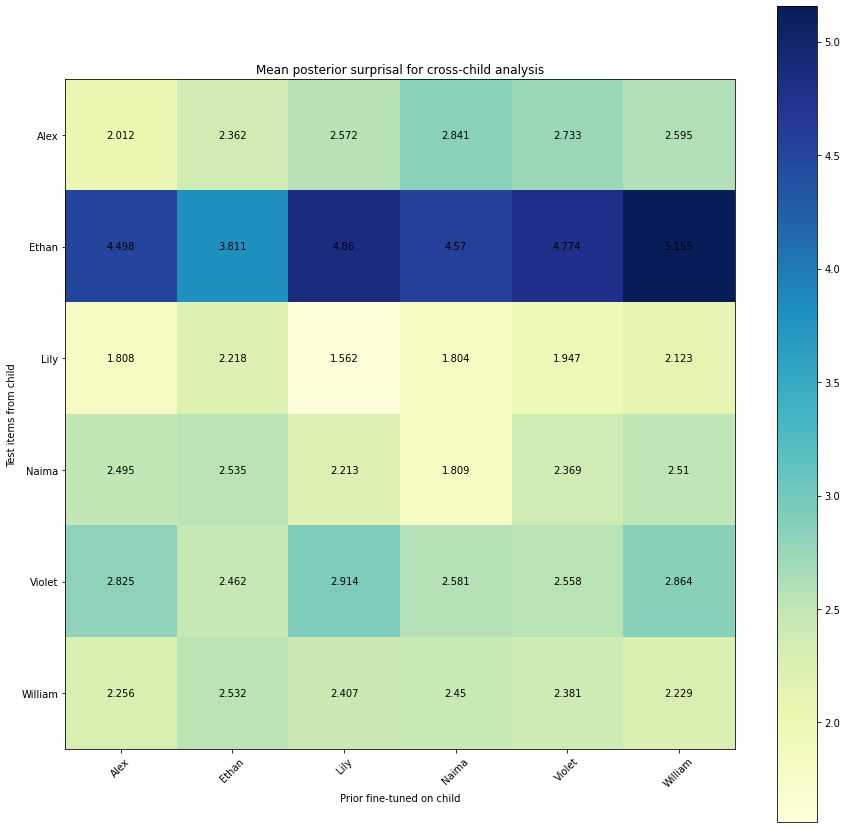

<Figure size 432x288 with 0 Axes>

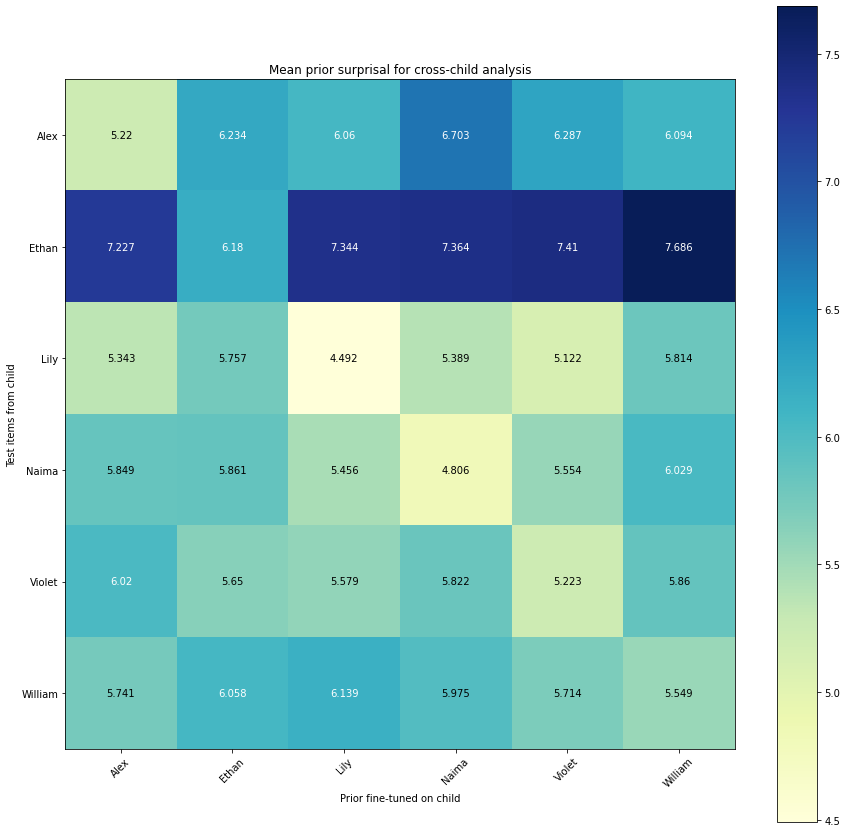

In [123]:

import importlib
importlib.reload(analysis)
    
plt.show(analysis.get_success_scores(is_mean = True, which_key = 'posterior_surprisal'))
plt.show(analysis.get_success_scores(is_mean = True, which_key = 'prior_surprisal'))

<Figure size 432x288 with 0 Axes>

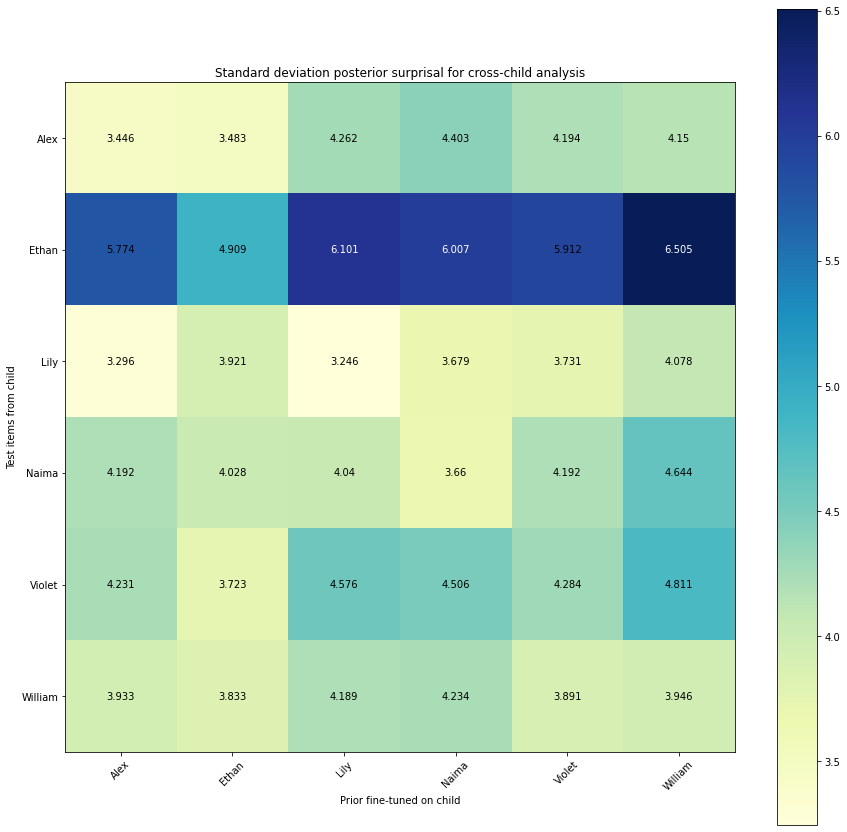

<Figure size 432x288 with 0 Axes>

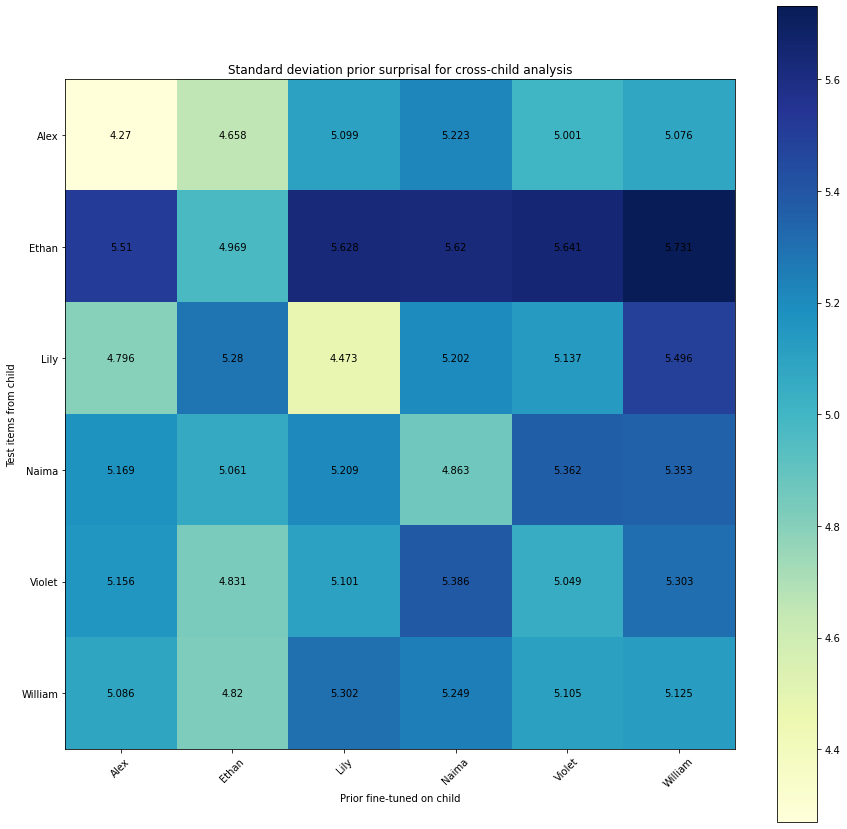

In [124]:

import importlib
importlib.reload(analysis)
 
plt.show(analysis.get_success_scores(is_mean = False, which_key = 'posterior_surprisal'))
plt.show(analysis.get_success_scores(is_mean = False, which_key = 'prior_surprisal'))

# Analyzing failures

In [101]:
import importlib
importlib.reload(analysis)

# How to input to this code?
# You need to load the cross scoring, then do what?

cross_scores = analysis.load_all_scores()
cross_scores['token'] = cross_scores['token'].astype(str)
cross_scores_short = cross_scores[['cross_type', 'data_child', 'prior_child', 'posterior_surprisal','posterior_entropy','prior_surprisal',
    'kl_flat_to_prior', 'kl_flat_to_posterior','set','token','bert_token_id', 'edit_distance']]

%R -i cross_scores_short

In [102]:

%%R
library(plotROC)

cross_scores_short$set_binarized = 0
cross_scores_short$set_binarized[cross_scores_short$set == 'failure'] = 1
table(cross_scores_short$set_binarized)


    0     1 
42690 17832 


In [103]:

%%R
# Get AUC scores into these
unique(as.character(cross_scores_short$cross_type))

 [1] "data-Alex+prior_child-Alex"       "data-Alex+prior_child-Ethan"     
 [3] "data-Alex+prior_child-Lily"       "data-Alex+prior_child-Naima"     
 [5] "data-Alex+prior_child-Violet"     "data-Alex+prior_child-William"   
 [7] "data-Ethan+prior_child-Alex"      "data-Ethan+prior_child-Ethan"    
 [9] "data-Ethan+prior_child-Lily"      "data-Ethan+prior_child-Naima"    
[11] "data-Ethan+prior_child-Violet"    "data-Ethan+prior_child-William"  
[13] "data-Lily+prior_child-Alex"       "data-Lily+prior_child-Ethan"     
[15] "data-Lily+prior_child-Lily"       "data-Lily+prior_child-Naima"     
[17] "data-Lily+prior_child-Violet"     "data-Lily+prior_child-William"   
[19] "data-Naima+prior_child-Alex"      "data-Naima+prior_child-Ethan"    
[21] "data-Naima+prior_child-Lily"      "data-Naima+prior_child-Naima"    
[23] "data-Naima+prior_child-Violet"    "data-Naima+prior_child-William"  
[25] "data-Violet+prior_child-Alex"     "data-Violet+prior_child-Ethan"   
[27] "data-Violet+prior_c

In [104]:

%%R
library('pROC')
auc_by_model = do.call('rbind', lapply(unique(cross_scores_short$cross_type), 
      function(model_name){
    one_model = subset(cross_scores_short, cross_type == model_name)
    roc1 = roc(one_model$set_binarized, one_model$posterior_entropy)
    return(data.frame(cross_type=model_name, auc = auc(roc1)))}))

cross_scores_short = merge(cross_scores_short, auc_by_model)


R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case =

In [129]:
%%R
cross_scores_short$model_with_auc = paste0(cross_scores_short$cross_type,' (AUC = ',
round(cross_scores_short$auc, 3),')')

In [130]:
%%R
cross_scores_short$model_with_auc[1:10]

 [1] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [2] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [3] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [4] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [5] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [6] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [7] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [8] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [9] "data-Alex+prior_child-Alex (AUC = 0.814)"
[10] "data-Alex+prior_child-Alex (AUC = 0.814)"


In [131]:
# Now, plot the heatmap?

%R -o cross_scores_short

In [135]:
cross_scores_short.auc

1        0.813889
2        0.813889
3        0.813889
4        0.813889
5        0.813889
           ...   
60518    0.799085
60519    0.799085
60520    0.799085
60521    0.799085
60522    0.799085
Name: auc, Length: 60522, dtype: float64

<Figure size 432x288 with 0 Axes>

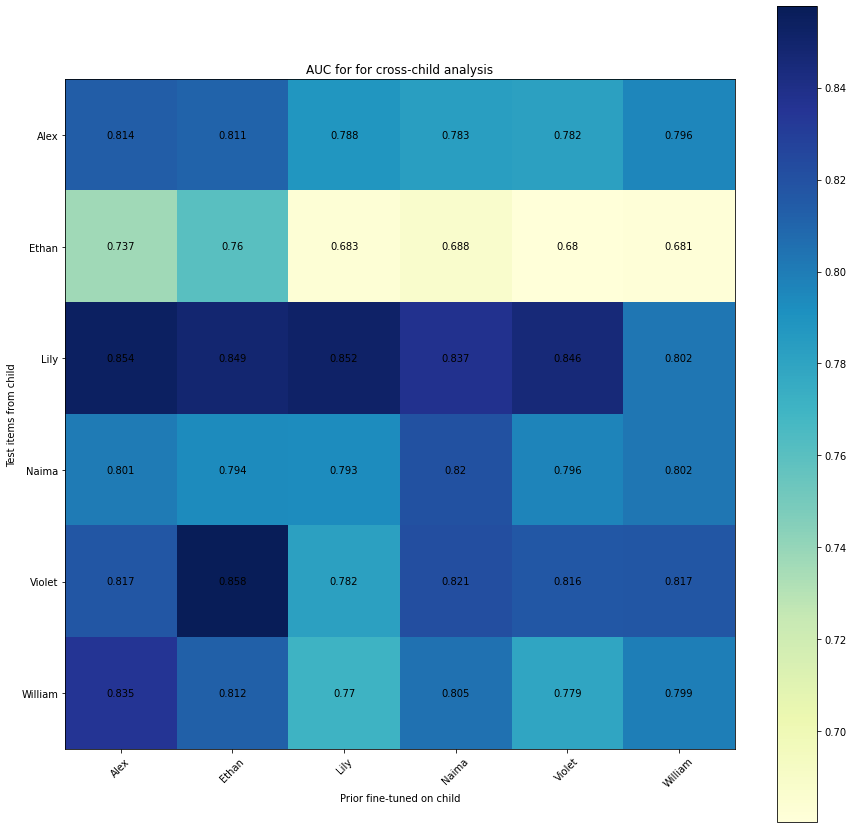

In [140]:
auc_df = cross_scores_short[['cross_type', 'auc']]
plt.show(analysis.get_heatmap('AUC for for cross-child analysis', analysis.organize_auc_scores_as_grid(auc_df)))

In [ ]:
# How to plot this as a heatmap?

In [89]:
unique_cross_auc

,cross_type,auc
1,data-Alex+prior_child-Alex,0.813889
1454,data-Alex+prior_child-Ethan,0.810605
2999,data-Alex+prior_child-Lily,0.787991
4557,data-Alex+prior_child-Naima,0.783462
6062,data-Alex+prior_child-Violet,0.781706
7570,data-Alex+prior_child-William,0.795683
9078,data-Ethan+prior_child-Alex,0.737073
10664,data-Ethan+prior_child-Ethan,0.760092
12274,data-Ethan+prior_child-Lily,0.682724
13863,data-Ethan+prior_child-Naima,0.687686


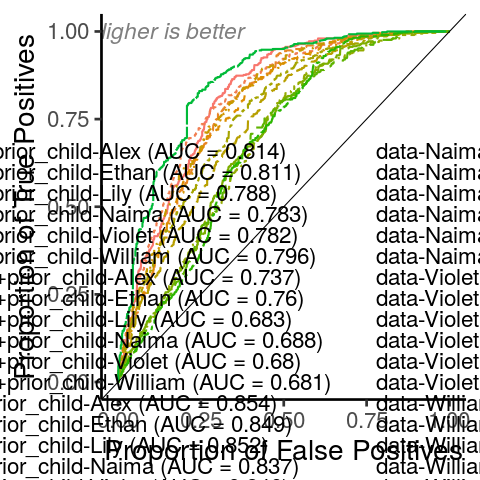

In [85]:


%%R 
p1 = ggplot(cross_scores_short[,c('set_binarized', 'model_with_auc', 'posterior_entropy')], 
       aes(d=set_binarized, m=posterior_entropy, color=model_with_auc, linetype = model_with_auc)
) + theme_classic(base_size=28)+ geom_roc(n.cuts=0) + xlab('Proportion of False Positives'
) + ylab('Proportion of True Positives') + theme(legend.position=c(.67, .20),
legend.background = element_blank(), legend.title = element_blank()) + annotate("text",
label= "Higher is better", size=8, fontface="italic", x=.15, y=1, alpha =.5) + geom_abline(intercept=0, slope=1)
print(p1)
ggsave('figures/roc_2.pdf', height=12, width=12)    